---
title: Cosine Example
venue: Modules
---

The cosine function is defined by its Taylor series which always converges:

$$
\label{equ-cos}
\cos(x):=1-\frac{x^2}{2}+\frac{x^4}{24}+\dots+(-1)^n\frac{x^{2n}}{(2n)!}+\dots
$$

We can truncate [Equation (%s)](#equ-cos) to its first few terms to calculate an approximate value for $\cos(x)$. Let's define the approximation based on the first $N+1$ truncated power terms with the highest power $2N$ as: 

$$
\label{equ-cos-approx}
\cos_N(x):=1-\frac{x^2}{2}+\dots+(-1)^N\frac{x^{2N}}{(2N)!}
$$

Let's investigate how well [Equation (%s)](#equ-cos-approx) works for different numbers of truncations $N$ and specific arguments $x=1$. Define the relative approximation error of $\cos_N(x)$ with respect to the exact value $\cos(x)$ as:

$$
\epsilon_N(x)=\frac{|\cos(x)-\cos_N(x)|}{|\cos(x)|}
$$ 

For different values of $x=1,10,100$, the approximation error for the truncated power series $\cos_N$ is plotted as a function of $N$:

In [12]:
function cosN(x::Float64,N::Int64)
  # Truncated power series for cos up to order 2N
  result=0.0;  
  for i=0:N
        result+=(-1.0)^i*x^(2i)/factorial(2i);
  end
  return result;  
end

function rel_error(exact::Float64, approx::Float64)
    # Computes relative error, assumes nonzero exact value
    return abs.((exact-approx)./exact);
end

n=(1:10)
x1=1.0
x2=4.0
x3=7.0;

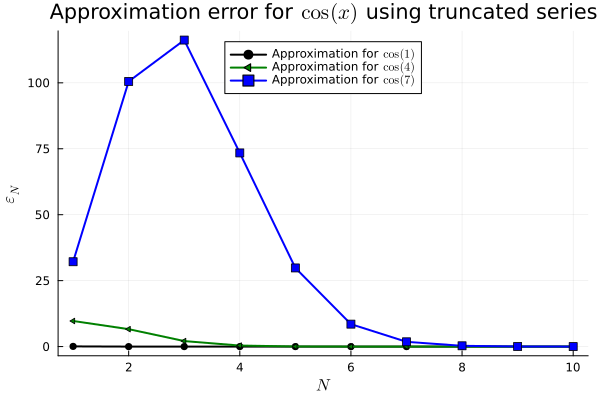

In [11]:
using Plots, LaTeXStrings

# Plot FD approxmation error in log plot, set line style, and place legend
Plots.plot(n,rel_error.(cos(x1),cosN.(x1,n)),
    label=L"Approximation for $\cos(1)$",
    lc=:black,lw=2,
    markershapes=:circle,
    color=:black )

Plots.plot!(n,rel_error.(cos(x2),cosN.(x2,n)),
    label=L"Approximation for $\cos(4)$",
    lc=:green,
    lw=2,
    markershapes=:ltriangle,
    color=:green )

Plots.plot!(n,rel_error.(cos(x3),cosN.(x3,n)),
    label=L"Approximation for $\cos(7)$",
    lc=:blue,
    lw=2,
    markershapes=:square,
    color=:blue)

Plots.plot!(legend=:top)
Plots.title!(L"Approximation error for $\cos(x)$ using truncated series")
xlabel!(L"N")
ylabel!(L"\epsilon_N")

It can be seen that for larger arguments $x$, more terms in the truncated series $\cos_N(x)$ are needed to achieve a reasonable approximation. Can you see why that's the case?

:::{hint}
Hint: Look how the terms in the power series develop with larger $N$.

Is there a better way of doing this?
:::

Exploit the periodicity of $\cos(x)$ with period $2\pi$. Idea: Subtract (or add) from a $x$ with large magnitude a sufficient integer multiple of $2\pi$ such that the result lies within $[-\pi,\pi]$. Thus we are computing $x \text{ mod } 2\pi$.

In [13]:
function mod2pi_(x::Float64)
  # Calculates x mod 2π, reduces to interval [-π, π]
  result=mod2pi(x);
  # Modulo function always returns positive result, map to negative result
  # if magnitude larger than π
    if result>pi 
        result=result-2pi;
    end
  return result;      
end

x1=1.0; x2=4.0; x3=7.0; x4=10.0
x1_=mod2pi_(x1);# Uses julia specific function mod2pi for exact modulo
x2_=mod2pi_(x2);
x3_=mod2pi_(x3);
x4_=mod2pi_(x4);

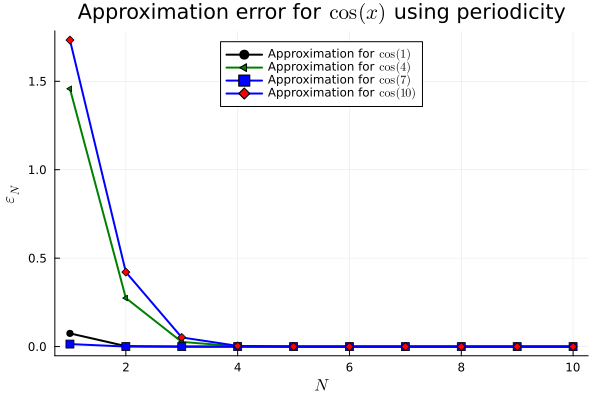

In [14]:
#Plot FD approxmation error in log plot, set line style, and place legend
Plots.plot(n,rel_error.(cos(x1),cosN.(x1_,n)),
    label=L"Approximation for $\cos(1)$",
    lc=:black,
    lw=2,
    markershapes=:circle,
    color=:black)

Plots.plot!(n,rel_error.(cos(x2),cosN.(x2_,n)),
    label=L"Approximation for $\cos(4)$",
    lc=:green,
    lw=2,
    markershapes=:ltriangle,
    color=:green)

Plots.plot!(n,rel_error.(cos(x3),cosN.(x3_,n)),
    label=L"Approximation for $\cos(7)$",
    lc=:blue,
    lw=2,
    markershapes=:square,
    color=:blue)

Plots.plot!(n,rel_error.(cos(x4),cosN.(x4_,n)),
    label=L"Approximation for $\cos(10)$",
    lc=:blue,
    lw=2,
    markershapes=:diamond,
    color=:red)

Plots.plot!(legend=:top)
Plots.title!(L"Approximation error for $\cos(x)$ using periodicity")
xlabel!(L"N")
ylabel!(L"\epsilon_N")

How does the accuracy of $\pi$ used in the previous scheme affect the accuracy?

In [15]:
function mod2pi_1(x::Float64,pi_)
  # Calculates x mod 2π, use approximate value pi_, reduces to interval
  # [-π ,π]
  result=mod(x,2pi_);
  # Modulo function always returns positive result, map to negative result
  # if magnitude larger than π
    if result>pi_
        result=result-2pi_;
    end
  return result;      
end

x2=100.0;

pi1=3.1416; pi2=3.1415926535

x21=mod2pi_1(x2,pi1); x22=mod2pi_1(x2,pi2);

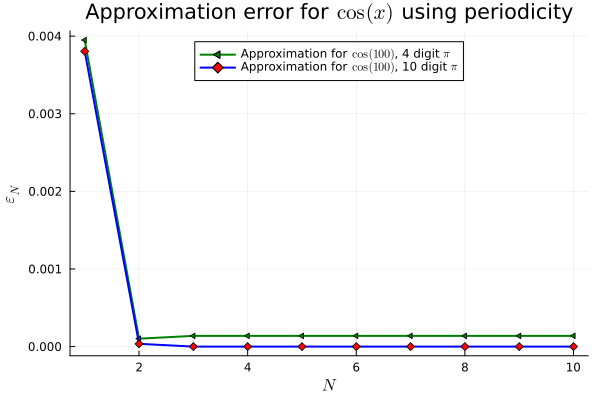

In [16]:
Plots.plot(n,rel_error.(cos(x2),cosN.(x21,n)),
    label=L"Approximation for $\cos(100)$, 4 digit $\pi$",
    lc=:green,
    lw=2,
    markershapes=:ltriangle,
    color=:green)

Plots.plot!(n,rel_error.(cos(x2),cosN.(x22,n)),
    label=L"Approximation for $\cos(100)$, 10 digit $\pi$",
    lc=:blue,
    lw=2,
    markershapes=:diamond,
    color=:red)

Plots.plot!(legend=:top)
Plots.title!(L"Approximation error for $\cos(x)$ using periodicity")
xlabel!(L"N")
ylabel!(L"\epsilon_N")